Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) of ``SVC`` for details.

- ``c = 1`` default 
- ``degree = 3`` default
- ``kernel = 'rbf'`` default

``kernel``: options include {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}.   default=’rbf’.  Check details of the [kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions). 


In [ ]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Linear SVC

Let's use ``SVC`` from ``sklearn.svm`` for the linear SVC model, set ``kernel = 'linear'``. 

Apart from ``SVC(kernel = 'linear')``, **we can also use ``LinearSVC`` to train linear SVM models.**   ``LinearSVC`` is similar to ``SVC`` with parameter ``kernel='linear'``, but implemented in terms of ``liblinear`` rather than ``libsvm``, so it has more flexibility in the choice of penalties and loss functions and should scale better to **large numbers of samples**.  Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) of ``LinearSVC`` for details.

## 1.1 Data preparation 

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATA_3105/svm_data1.csv')
df1.head()

,x1,x2,y
0,-1.879361,-3.260726,-1
1,10.550930,4.521751,1
2,7.493114,12.985845,1
3,4.785842,-0.035585,-1
4,10.988523,8.201115,1


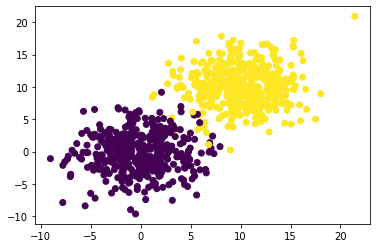

In [ ]:
# visualize the data

plt.scatter(x = 'x1', y = 'x2', c= 'y', data= df1);

**Split into train and test**

- test_size = 0.25 by default

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1[['x1','x2']], df1['y'], random_state=5)  

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(600, 2)

(200, 2)

(600,)

(200,)

**Scale the data**

Same as any ``regularized linear regression``(Lasso, Ridge), it is important to scale all features so that they are on the same scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   
X_test_scaled  = scaler.transform(X_test)

##  1.2  Compare two Linear SVC models with different ``C`` 

``C``:   Regularization parameter(cost). The regularization strengthis inversely proportional to C. Must be strictly positive.

- Large ``C``  ->  Less tolerant of errors in model training  -> Complicated model with less SV (tend to overfit)
- Small ``C``  ->  More tolerant of errors in model training  -> Simpler model with more SV 

**Train ``svm1`` with c  = 1(default)**

In [ ]:
svm1 = SVC(kernel='linear', C=1)  

svm1.fit(X_train_scaled, y_train)

display(svm1.intercept_, svm1.coef_)

array([-4.78317943])

array([[5.26079614, 4.90883181]])

In [ ]:
svm1.decision_function(X_train_scaled)    # f(x) values

array([ 2.23761376,  0.98163278,  1.15690489, -1.0488812 ,  2.59251558,
       -2.78444644,  2.68676075, -3.57623211, -2.66491565,  1.95634999,
       -2.24320462, -1.23945172,  2.08129348, -1.64186404,  2.44157472,
        1.25434971, -1.89034736, -2.70582513, -0.40655904,  1.91983804,
       -3.44864672,  1.03619773,  0.21001141,  1.65561252,  2.23168007,
       -2.07208663, -2.1518884 , -1.94633682, -1.93120203,  1.28760632,
       -1.9695281 ,  0.61615069, -1.96280002,  2.37710625,  1.1971699 ,
       -0.06996975,  0.93098625, -2.19092079,  1.27547884, -0.96965627,
        2.16458815, -1.11915628,  3.53699745,  1.1060398 , -1.80680492,
       -1.89494907, -2.38827978, -2.15184327, -1.54553284,  1.69215316,
       -1.07075369,  0.61827788,  1.3094946 ,  1.50294329, -3.13055742,
        2.4091207 ,  1.59737419, -1.70132351, -1.47135103, -1.19542652,
       -1.95492601,  1.0572362 , -1.61834443,  1.59004848,  1.1956473 ,
        1.62975076,  2.04191161,  1.2641852 , -2.32319548,  1.57

In [ ]:
svm1.n_support_  # Number of support vectors for each class.

array([46, 45], dtype=int32)

Let's plot the data and support vectors togther

- values for support vectors can be obtained using ``support_vectors_`` attribute


In [ ]:
sv = svm1.support_vectors_  
sv

array([[0.39398977, 0.46934192],
       [0.48223874, 0.26005443],
       [0.55727007, 0.34047754],
       [0.49049975, 0.46171724],
       [0.45981918, 0.40883885],
       [0.40340195, 0.44735151],
       [0.47379194, 0.37737678],
       [0.29190693, 0.51533899],
       [0.42675856, 0.35403973],
       [0.50961299, 0.22450057],
       [0.52366093, 0.36020331],
       [0.29074334, 0.52221952],
       [0.36691108, 0.38016432],
       [0.37543932, 0.39536758],
       [0.39481996, 0.41015925],
       [0.22214807, 0.53734076],
       [0.39039781, 0.41989295],
       [0.35275181, 0.41101073],
       [0.35347596, 0.4776655 ],
       [0.34065721, 0.43263684],
       [0.35301314, 0.42484887],
       [0.53288498, 0.39360334],
       [0.3798856 , 0.41912607],
       [0.33810204, 0.44425155],
       [0.4592544 , 0.33347147],
       [0.47211117, 0.49997806],
       [0.33337253, 0.46395348],
       [0.48304455, 0.50425133],
       [0.27588279, 0.48958417],
       [0.37740035, 0.43388178],
       [0.

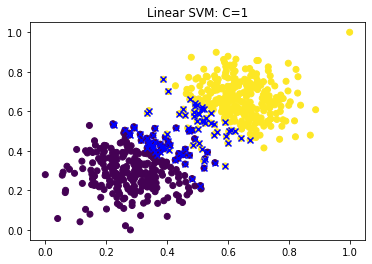

In [ ]:
# cross signs are SVs

sv = svm1.support_vectors_   # 91 * 2 array
params = svm1.get_params()   # a dictionary with param name as keys and param value as values

plt.scatter(x = X_train_scaled[:,0], y= X_train_scaled[:,1], c= y_train)  # plot the data

plt.scatter(x = sv[:, 0], y = sv[:, 1], c='blue', marker='x')                # plot the support vectors as red crosses

plt.title("Linear SVM: C={}".format(params['C']));           

**Train ``svm2`` with C = 1000**

- Less tolerant of hinge loss, so the model will be more complicated with less SVs. 

In [ ]:
svm2 = SVC(kernel='linear', C=1000)

svm2.fit(X_train_scaled,y_train)

display(svm2.intercept_, svm2.coef_, svm2.n_support_)    # Check Params & No. of SVs

array([-11.96462133])

array([[10.52920697, 15.13370747]])

array([12, 11], dtype=int32)

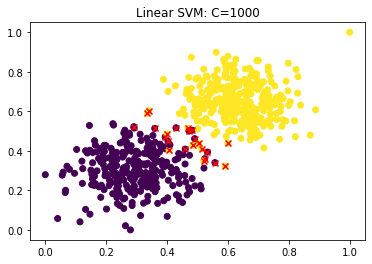

In [ ]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c = y_train)

plt.scatter(svm2.support_vectors_[:, 0], svm2.support_vectors_[:, 1], c='r', marker='x')

plt.title("Linear SVM: C={}".format(svm2.get_params()['C']));

## 1.3 Check training and test (generalization) accuracy for ``svm1`` and ``svm2``

-  Question: is ``svm2`` overfitting? 

**Check train accurracy for svm1 and svm2**

In [ ]:
print("Train Acc: svm1 - {:.3f}, svm2 - {:.3f}".format(svm1.score(X_train_scaled,y_train), 
                                svm2.score(X_train_scaled,y_train)))      

Train Acc: svm1 - 0.980, svm2 - 0.982


**Check test accurracy for svm1 and svm2**

In [ ]:
print("Generalization Acc: svm1 - {:.3f}, svm2 - {:.3f}".format(svm1.score(X_test_scaled,y_test), 
                                                                svm2.score(X_test_scaled,y_test)))    

Generalization Acc: svm1 - 0.990, svm2 - 0.990


## 1.4 Check generalization Accuracy through Cross validation  

As one single holdout testing is not reliable, let's compute the average test accuracy for the two models through 5-fold cross validation.     Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) of ``sklearn.model_selection.cross_val_score`` for details.

- Question: is ``svm2`` overfitting?

**Scale entire dataset first**

In [ ]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df1[['x1', 'x2']])    

y = df1['y']

**5-fold cross validation of ``svm1``(C=1)**

In [ ]:
from sklearn.model_selection import cross_val_score

svm1 = SVC(kernel='linear', C=1)  

svm1_cv = cross_val_score(estimator = svm1, X = X_scaled, y = y, cv=5)   # entire data

display(svm1_cv, svm1_cv.mean(), svm1_cv.std()) 

array([0.96875, 0.975  , 0.9875 , 0.99375, 0.98125])

0.98125

0.00883883476483186

**5-fold cross validation of ``svm2`` (C = 1000)**

<font color=red>***Exercise 1: Your Codes Here***</font>  


In [ ]:
svm2 = SVC(kernel='linear', C=1000)  

svm2_cv = cross_val_score(estimator = svm2, X = X_scaled, y = y, cv=5)   # entire data

display(svm2_cv, svm2_cv.mean(), svm2_cv.std()) #better model

array([0.975  , 0.975  , 0.9875 , 0.99375, 0.98125])

0.9824999999999999

0.0072886898685566495

## 1.5 Grid Search 

Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) of ``sklearn.model_selection.GridSearchCV`` for details. 

- Default ``refit``=True: refit an model using the best found parameters on the whole dataset(i.e., training set).

- Set ``return_train_score`` = ``True`` (default ``False``), if training accuracy for each fold is needed (e.g., for fitting graph). 


How many models have been trained in this process? ``No.of C values`` * ``cv``

**Find the best C**

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel='linear')

param_range1 = {'C': [0.00001,0.0001,0.001,0.01, 0.1,5,10,100,1000,2000]}   # 10 C values

grid1 = GridSearchCV(estimator = svm_linear, param_grid = param_range1, cv =5)  

grid1.fit(X_train_scaled, y_train)     # grid search on train(sub_train + validation)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 5, 10, 100,
                               1000, 2000]})

Each row in results corresponds to one particular parameter setting. For each setting, the results of all cross-validation splits are recorded, as well as the mean and standard deviation over all splits.

In [ ]:
# grid1.cv_results_ is a dictionary, let's convert it as a dataframe

pd.DataFrame(grid1.cv_results_)  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006748,0.000457,0.002004,0.000074,0.00001,{'C': 1e-05},0.516667,0.516667,0.516667,0.516667,0.516667,0.516667,0.000000,8
1,0.006563,0.000151,0.001957,0.000032,0.0001,{'C': 0.0001},0.516667,0.516667,0.516667,0.516667,0.516667,0.516667,0.000000,8
2,0.006638,0.000165,0.001993,0.000042,0.001,{'C': 0.001},0.516667,0.516667,0.516667,0.516667,0.516667,0.516667,0.000000,8
3,0.006940,0.000823,0.001938,0.000026,0.01,{'C': 0.01},0.516667,0.525000,0.516667,0.516667,0.516667,0.518333,0.003333,7
4,0.004205,0.000116,0.001381,0.000043,0.1,{'C': 0.1},0.983333,0.991667,0.975000,0.983333,0.975000,0.981667,0.006236,1
5,0.001786,0.000103,0.000757,0.000159,5,{'C': 5},0.983333,0.983333,0.975000,0.975000,0.975000,0.978333,0.004082,6
6,0.001693,0.000024,0.000664,0.000028,10,{'C': 10},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2
7,0.001621,0.000068,0.000608,0.000008,100,{'C': 100},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2
8,0.002320,0.000449,0.000650,0.000025,1000,{'C': 1000},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2
9,0.002775,0.000665,0.000658,0.000046,2000,{'C': 2000},0.983333,0.983333,0.983333,0.975000,0.975000,0.980000,0.004082,2


**Get the best C value**

The best C value is the one which gives the highest ``mean test score`` (also called ``best cv score``) on the validation set during cross validation. The ``best_score_`` attribute stores the mean cross-validation accuracy, with cross-validation performed on the training set.

In [ ]:
print("Best Params:{}".format(grid1.best_params_)) 

# The highest mean test score - corresponding to the best C value (on validation set)  
print("Best cv score:{}".format(grid1.best_score_))   

Best Params:{'C': 0.1}
Best cv score:0.9816666666666667


**Get the best model**

Fitting the ``GridSearchCV`` object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the best C value.  The best model refit on training data is returned by the ``best_estimator_`` attribute. 

In [ ]:
grid1.best_estimator_

SVC(C=0.1, kernel='linear')

With the best model refit and returned automatically, you can check the coefficients, number of support vectors in the training process; or make predictions with the model directly, or check its performance on any new data (e.g., test data), etc.

Here let's **check the coefficients to see the importance of each feature** first.

In [ ]:
linear_best = grid1.best_estimator_

#linear_best = SVC(kernel = 'linear', C = 0.1).fit(X_train_scaled, y_train)  # same as above

display(linear_best.intercept_,linear_best.coef_)

array([-2.84067188])

array([[3.05389855, 3.06979482]])

**Check the generalization accuracy of the best model on test data**

- apply the ``.score`` method to the best model

- alternatively, apply the ``.score`` method to the ``gridsearchcv`` object. as *The ``grid_search`` object itself has ``predict`` and ``score`` methods* 

In [ ]:
linear_best.score(X_test_scaled, y_test)

0.99

In [ ]:
grid1.score(X_test_scaled, y_test)   # same as above

0.99

#  2. Nonlinear SVM: Polynomial Kernel

`degree`: int, default=3.  Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. 

- models with high degree are more complicated and tend to overfit. 
- Note that some attributes such as ``.coef_`` is only available when ``kernel = 'linear'``.*

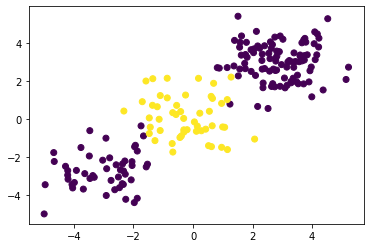

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DATA_3105/svm_data2.csv')

plt.scatter(x = 'x1', y = 'x2', c= 'y', data= df2);

## 2.1 Compare two poly SVM models with different ``degree``

**Scale entire data before cross_validation.**

In [ ]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df2[['x1', 'x2']])

y = df2['y']

**Train ``svm_poly1`` with ``degree`` = 2, check generalization accucacy with 5-fold CV**

In [ ]:
svm_poly1 = SVC(kernel='poly', degree=2)

svm_poly1_cv = cross_val_score(estimator = svm_poly1, X = X_scaled, y = y, cv=5)

print("svm_poly1: 5-fold Avarage test accuracy:", svm_poly1_cv.mean())

svm_poly1: 5-fold Avarage test accuracy: 0.65


**Train ``svm_poly2`` with degree = 6, check generalization accucacy with 5-fold CV**

- Set degree = 6 for ``svm_poly2``,  check averaged generalization accuracy of ``svm_poly2`` with 5-fold cross validation (use ``X_scaled`` and ``y`` ).

Worse generalization? Poly with higher degree tend to overfit. 

<font color=red>***Exercise 2: Your Codes Here***</font>  


In [ ]:
svm_poly2 = SVC(kernel='poly', degree=6)

svm_poly2_cv = cross_val_score(estimator = svm_poly2, X = X_scaled, y = y, cv=5)

print("svm_poly2: 5-fold Avarage test accuracy:", svm_poly2_cv.mean())

svm_poly2: 5-fold Avarage test accuracy: 0.595


## 2.2 GridSearch: Tune ``C`` and ``degree`` together 

It may takes a while, how many models have been trained in this process?  ``No. of C`` * ``No. of degree`` * ``CV``

- set ``cv = 3`` to reduce searching time. 

**Split and Scale Data**

As we didn't split in the cross-validation stage.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2[['x1','x2']], df2['y'], random_state=0)  

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)    

X_test_scaled = scaler.transform(X_test)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 2)

(50, 2)

(150,)

(50,)

**GridSearch with 3-fold cross validation**

In [ ]:
param_range2 = {'C': [0.01, 1, 100], 'degree': [3, 5, 6]}   # 3 * 3 params 

poly = SVC(kernel='poly')

grid2 = GridSearchCV(estimator = poly, param_grid = param_range2, cv=3) 

grid2.fit(X_train_scaled, y_train)      

print("Best Params:{}".format(grid2.best_params_)) 
print("Mean cv score of the best estimator:{:.3f}".format(grid2.best_score_))    

Best Params:{'C': 100, 'degree': 6}
Mean cv score of the best estimator:0.767


In [ ]:
pd.DataFrame(grid2.cv_results_)        # Check why it takes so long?

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002303,0.000367,0.000875,0.000070,0.01,3,"{'C': 0.01, 'degree': 3}",0.76,0.76,0.74,0.753333,0.009428,3
1,0.032553,0.010693,0.001027,0.000193,0.01,5,"{'C': 0.01, 'degree': 5}",0.76,0.76,0.74,0.753333,0.009428,3
2,0.077340,0.019046,0.001109,0.000172,0.01,6,"{'C': 0.01, 'degree': 6}",0.76,0.76,0.74,0.753333,0.009428,3
3,0.024799,0.021968,0.001129,0.000034,1,3,"{'C': 1, 'degree': 3}",0.76,0.76,0.74,0.753333,0.009428,3
4,7.486792,5.127138,0.002903,0.002276,1,5,"{'C': 1, 'degree': 5}",0.76,0.76,0.74,0.753333,0.009428,3
5,12.024369,6.253077,0.001188,0.000400,1,6,"{'C': 1, 'degree': 6}",0.76,0.76,0.74,0.753333,0.009428,3
6,4.212379,2.504919,0.001280,0.000254,100,3,"{'C': 100, 'degree': 3}",0.76,0.76,0.74,0.753333,0.009428,3
7,26.103387,16.796636,0.001020,0.000144,100,5,"{'C': 100, 'degree': 5}",0.78,0.76,0.74,0.760000,0.016330,2
8,48.822563,21.188961,0.001223,0.000288,100,6,"{'C': 100, 'degree': 6}",0.80,0.76,0.74,0.766667,0.024944,1


**Visualize validation scores**

As we were searching a 2D grid of parameters (``C`` and ``degree``), this is best visualized as a heat map using [matplotlib.pyplot.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html). 

- First we extract the mean validation scores, then we reshape the scores so that the axes correspond to C and gamma:

In [ ]:
grid2.cv_results_['params']    # take a look of the params first

In [ ]:
scores = grid2.cv_results_['mean_test_score'].reshape(3,3)   # reshape into a 2D array. 

scores  # rows refers to C values, columns refers to degrees

In [ ]:
plt.matshow(scores,  cmap="viridis")
plt.xlabel("degree")
plt.ylabel("C")
plt.xticks(ticks = range(len(param_range2['degree'])), labels = param_range2['degree'])
plt.yticks(ticks = range(len(param_range2['C'])), labels = param_range2['C'])
plt.colorbar()
plt.title('Mean Test Scores on Validation Sets');

**Get best model and visualize it**

- Best model refit on the entire train set (i.e., sub_train + validation).

In [ ]:
poly_best = grid2.best_estimator_   

plt.scatter(x = X_train_scaled[:,0], y = X_train_scaled[:,1], c = y_train)

plt.scatter(poly_best.support_vectors_[:,0], poly_best.support_vectors_[:,1], c='r', marker='x')

plt.title("Best SVM:Poly kernel\n C = {}, degree={}".format(poly_best.get_params()['C'],
                                                            poly_best.get_params()['degree']));

**Check generalization accuracy of best model on test data**

In [ ]:
poly_best.score(X_test_scaled, y_test)